In [2]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
import cmocean 

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 

#### Import datasets

In [8]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'  #### This is the home directory we are always working out of

## CO2 data
ds_CO2_MaunaLoa = pd.read_csv(ees_climate_dir+'unit2/data/greenhouse_gases/CO2_MaunaLoa_TimeSeries.csv',parse_dates=['Date'])
ds_CO2_NOAA = pd.read_csv(ees_climate_dir+'unit2/data/greenhouse_gases/CO2_NOAA_TimeSeries.csv',parse_dates=['Date'])
ds_CO2_WDCGG = pd.read_csv(ees_climate_dir+'unit2/data/greenhouse_gases/CO2_WDCGG_TimeSeries.csv',parse_dates=['Date'])

## CH4 and NO2
ds_NO2 = pd.read_csv(ees_climate_dir + 'unit2/data/greenhouse_gases/WDCGG_N2O.csv')
ds_CH4 = pd.read_csv(ees_climate_dir + 'unit2/data/greenhouse_gases/NOAA_CH4.csv')

##### Note that when you load in your NO2 and CH4 datasets that these contain monthly data, so you have a column for both `Year` and `Month` in your Pandas DataFrame:


In [10]:
ds_NO2

,Year,Month,WDCGG N2O (ppb),WDCGG N2O uncertainty
0,1984,1,303.8,NaN
1,1984,2,303.8,NaN
2,1984,3,303.7,NaN
3,1984,4,303.7,NaN
4,1984,5,303.7,NaN
...,...,...,...,...
451,2021,8,334.5,NaN
452,2021,9,334.7,NaN
453,2021,10,334.9,NaN
454,2021,11,335.1,NaN


#### This means that for each year, there are 12 values, which would create an issue while plotting, producing step-like features in our data.

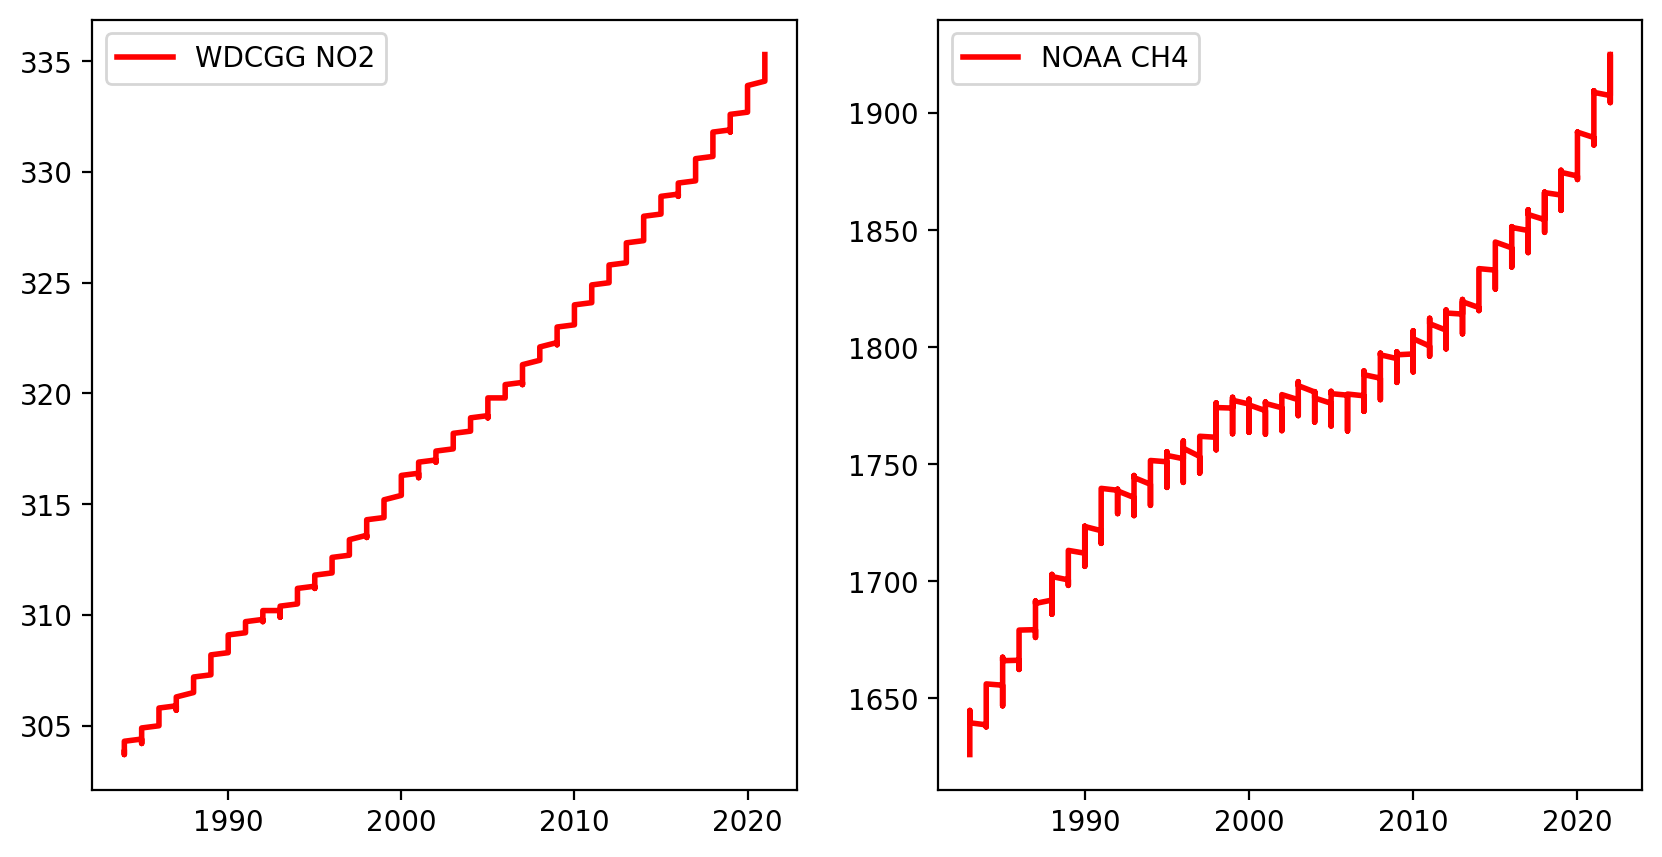

In [42]:
fig, (ax0, ax1) = plt.subplots(ncols=2,nrows=1,figsize=(10,5))

ax0.plot(ds_NO2['Year'],
         ds_NO2['WDCGG N2O (ppb)'],
         linewidth=2,label='WDCGG NO2',
         color='red')

ax1.plot(ds_CH4['Year'],
         ds_CH4['NOAA CH4 (ppb)'],
         linewidth=2,label='NOAA CH4',
         color='red')

## plot a legend on the ax
ax0.legend()
ax1.legend()

##### We can use Pandas' `to_datetime` method to convert the Year and Month Series into a calendar date. It does not matter what day you choose to assign since we are not dealing with daily data, here we use `day=1.` inthe code below:

In [22]:
calendar_date_CH4 = pd.to_datetime(ds_CH4[['Year', 'Month']].assign(day=1))
calendar_date_NO2 = pd.to_datetime(ds_NO2[['Year', 'Month']].assign(day=1))

In [23]:
calendar_date_CH4

0     1983-07-01
1     1983-08-01
2     1983-09-01
3     1983-10-01
4     1983-11-01
         ...    
469   2022-08-01
470   2022-09-01
471   2022-10-01
472   2022-11-01
473   2022-12-01
Length: 474, dtype: datetime64[ns]

##### We can then assign this new `Date` to our Pandas DataFrames:

In [25]:
ds_CH4['Date'] = calendar_date_CH4
ds_NO2['Date'] = calendar_date_NO2

In [26]:
ds_CH4

,Year,Month,NOAA CH4 (ppb),NOAA CH4 uncertainty,Date
0,1983,7,1625.95,4.116,1983-07-01
1,1983,8,1628.06,5.272,1983-08-01
2,1983,9,1638.44,4.567,1983-09-01
3,1983,10,1644.80,3.116,1983-10-01
4,1983,11,1642.60,1.529,1983-11-01
...,...,...,...,...,...
469,2022,8,1908.78,NaN,2022-08-01
470,2022,9,1915.53,NaN,2022-09-01
471,2022,10,1920.01,NaN,2022-10-01
472,2022,11,1923.78,NaN,2022-11-01


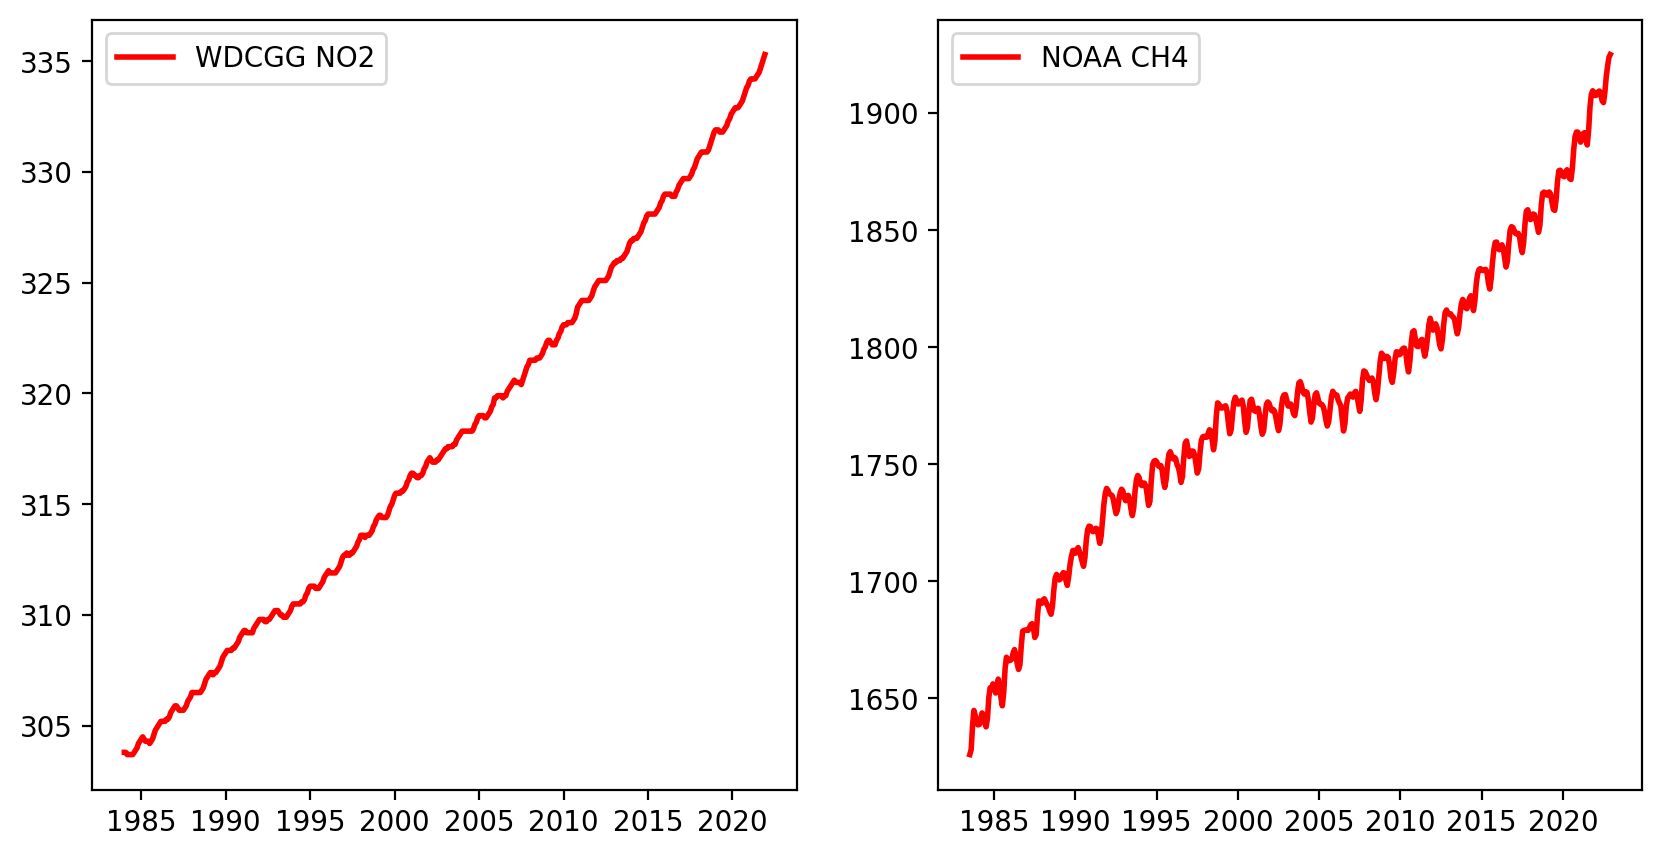

In [43]:
fig, (ax0, ax1) = plt.subplots(ncols=2,nrows=1,figsize=(10,5))

ax0.plot(ds_NO2['Date'],
         ds_NO2['WDCGG N2O (ppb)'],
         linewidth=2,label='WDCGG NO2',
         color='red')

ax1.plot(ds_CH4['Date'],
         ds_CH4['NOAA CH4 (ppb)'],
         linewidth=2,label='NOAA CH4',
         color='red')

## plot a legend on the ax
ax0.legend()
ax1.legend()